## Appendix A: Import, Analyse and Visualise Data

In [1]:
#import relevant packages and libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.rcParams.update({'font.size': 14})

#import the data using pandas
#this reads the data into a "dataframe"
unfiltered_data = pd.read_csv("cholesterol.csv", sep=',')

In [2]:
#filter out only the men, using the column 'sex'
only_men = unfiltered_data['sex']==1
data = unfiltered_data[only_men]
data = data[['age','sex','chol']]

#this shows the first 7 rows of data on men
data.head(7)

,age,sex,chol
0,63,1,233
1,37,1,250
3,56,1,236
5,57,1,192
7,44,1,263
8,52,1,199
9,57,1,168


In [3]:
#this checks for any missing values
#sieves through the data to check for any null values
#represented as a percentage of missing values in each column in the dataset
data.isnull().sum()/len(unfiltered_data)*100

age     0.0
sex     0.0
chol    0.0
dtype: float64

In [4]:
#print the summary statistics (count, mean, SD, etc.)

#as explained in the documentation, Bessel's correction is used by default. 
#this means that the denominator in the calculation of standard deviation is n-1
#(https://pandas/pydata.org/panadas-docs/stable/generated/pandas.DataFrame.std.html)

data.describe()

,age,sex,chol
count,207.000000,207.0,207.000000
mean,53.758454,1.0,239.289855
std,8.883803,0.0,42.782392
min,29.000000,1.0,126.000000
25%,47.000000,1.0,208.000000
50%,54.000000,1.0,235.000000
75%,59.500000,1.0,268.000000
max,77.000000,1.0,353.000000


In [5]:
#This function utilises the library functions to compute the median and the mode

def median_and_mode(column):
    print(column)
    print("- Median = ", np.median(data[column]))
    print("- Mode = ", stats.mode(data[column])[0][0]) #to make sure more than 1 mode can be returned
    
median_and_mode('age')
median_and_mode('chol')

age
- Median =  54.0
- Mode =  57
chol
- Median =  235.0
- Mode =  212


[63, 37, 56, 57, 44, 52, 57, 54, 49, 64, 43, 59, 44, 42, 61, 40, 59, 51, 53, 65, 44, 54, 51, 54, 48, 45, 39, 52, 44, 47, 66, 62, 52, 48, 45, 34, 54, 52, 41, 58, 51, 44, 54, 51, 29, 51, 51, 59, 52, 58, 41, 45, 52, 68, 46, 48, 57, 52, 53, 52, 43, 53, 42, 59, 42, 50, 69, 57, 43, 55, 41, 56, 59, 47, 42, 41, 62, 57, 64, 43, 70, 44, 42, 66, 64, 47, 35, 58, 56, 56, 41, 38, 38, 67, 67, 63, 53, 56, 48, 58, 58, 60, 40, 60, 64, 43, 57, 55, 58, 50, 44, 60, 54, 50, 41, 58, 54, 60, 60, 59, 46, 67, 62, 65, 44, 60, 58, 68, 52, 59, 49, 59, 57, 61, 39, 56, 63, 65, 48, 55, 65, 54, 70, 62, 35, 59, 64, 47, 57, 55, 64, 70, 51, 58, 60, 77, 35, 70, 64, 57, 56, 48, 66, 54, 69, 51, 43, 67, 59, 45, 58, 50, 38, 52, 53, 54, 66, 49, 54, 56, 46, 61, 67, 58, 47, 52, 58, 57, 61, 42, 52, 59, 40, 61, 46, 59, 57, 57, 61, 58, 67, 44, 63, 59, 45, 68, 57]
[233, 250, 236, 192, 263, 199, 168, 239, 266, 211, 247, 234, 233, 226, 243, 199, 212, 175, 197, 177, 219, 273, 213, 232, 245, 208, 321, 325, 235, 257, 302, 231, 201, 222, 

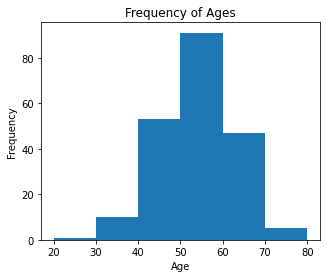

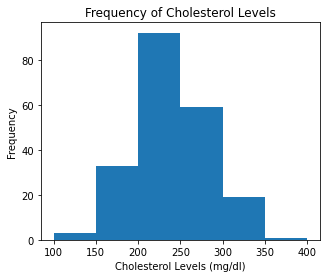

In [6]:
#transforms the dataframe into simple list for easier analysis
ages = list(data['age'].values)
chol = list(data['chol'].values)

print(ages)
print(chol)

%matplotlib inline
#this creates a histogram for age
def histogram_age():
    
    plt.figure(figsize=[5,4])
    x = ages
    
    bins_list = [20,30,40,50,60,70,80]
    n, bins, patches = plt.hist(x, bins_list)
    
    plt.title('Frequency of Ages')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    
    plt.show()

#this creates a histogram for the cholesterol levels
def histogram_chol():
    
    plt.figure(figsize=[5,4])
    x = chol
    
    bins_list = [100,150,200,250,300,350,400]
    n, bins, patches = plt.hist(x, bins_list)
    
    plt.title('Frequency of Cholesterol Levels')
    plt.xlabel('Cholesterol Levels (mg/dl)')
    plt.ylabel('Frequency')

    plt.show()

histogram_age()
histogram_chol()

## Appendix B: Examine the Subgroups

Cholesterol Levels (Younger Men)
- n1 =  155
- Mean =  236.81935483870967
- Median =  233.0
- Mode =  ModeResult(mode=array([204]), count=array([4]))
- SD =  43.28469195942859
- range =  227


Cholesterol Levels (Older Men)
- n2 =  52
- Mean =  246.65384615384616
- Median =  246.0
- Mode =  ModeResult(mode=array([254]), count=array([4]))
- SD =  40.76565481343362
- range =  169


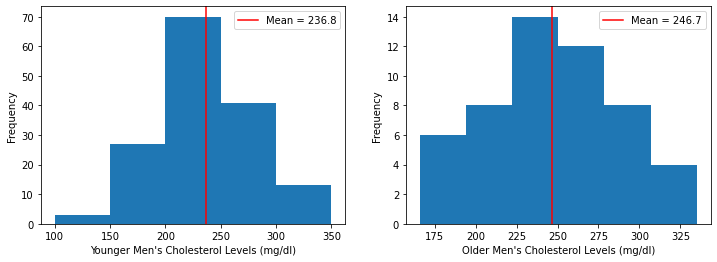

In [7]:
#create lists for older men and younger men

younger_men = []
older_men = []

for i in range(len(chol)):
    #iterates through the list. If the age is less than 60, appended to younger men list
    if ages[i]<60:
        younger_men.append(chol[i])
    #else, which means age equals or more than 60, appended to older men list
    else:
        older_men.append(chol[i])

#print summary statistics

def summary1(column):
    print("- n1 = ", len(column))
    print("- Mean = ", np.mean(column))
    print("- Median = ", np.median(column))
    print("- Mode = ", stats.mode(column))
    print("- SD = ", stats.tstd(column))
    print("- range = ", (max(column)-min(column))) #range is max-min in the list

def summary2(column):
    print("- n2 = ", len(column))
    print("- Mean = ", np.mean(column))
    print("- Median = ", np.median(column))
    print("- Mode = ", stats.mode(column))
    print("- SD = ", stats.tstd(column))
    print("- range = ", (max(column)-min(column)))
    
print("Cholesterol Levels (Younger Men)")
summary1(younger_men)
print('\n')
print("Cholesterol Levels (Older Men)")
summary2(older_men)          

#create histograms for each subgroup
fig, axs = plt.subplots(1,2,figsize=(12,4))
bins_list = [100,150,200,250,300,350]
axs[0].axvline(x = 236.8, color = 'red', label = 'Mean = 236.8') #this draws a vertical line to show mean chol level
axs[0].hist(younger_men,bins_list);
axs[0].set(xlabel='Younger Men\'s Cholesterol Levels (mg/dl)', ylabel = 'Frequency');
axs[0].legend();

axs[1].axvline(x = 246.7, color = 'red', label = 'Mean = 246.7') #this draws a vertical line to show mean chol level
axs[1].hist(older_men,6);
axs[1].set(xlabel='Older Men\'s Cholesterol Levels (mg/dl)', ylabel = 'Frequency');
axs[1].legend();

## Appendix C: Difference of Means Test

In [8]:
#this function inputs two lists and performs a difference of means test
def difference_of_means_test(data1,data2,tails):
    n1 = len(data1)
    n2 = len(data2)

    x1 = np.mean(data1)
    x2 = np.mean(data2)

    #sample SD formula (aka Bessel’s correction): which uses n-1 in denominator
    s1 = np.std(data1,ddof=1) 
    s2 = np.std(data2,ddof=1)

    SE = np.sqrt(s1**2/n1 + s2**2/n2)
    Tscore = np.abs((x2 - x1))/SE
    df = min(n1,n2) - 1 #conservative estimate from OpenIntro Statistics
    pvalue = tails*stats.t.cdf(-Tscore,df)

    SDpooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1))/(n1+n2-2)) # OpenIntro section 5.3.6
    Hedgesg = (x2 - x1)/SDpooled

    print('T =',Tscore)
    print('p =',pvalue)
    print('g =',Hedgesg)
    
difference_of_means_test(younger_men,older_men,1)

T = 1.4818318312351821
p = 0.07226891683211992
g = 0.23046760770505678


## Appendix D: Confidence Interval

In [9]:
#function to compute the confidence interval from mean, SD and sample size
def confidence_interval(data_list):
    n = len(data_list)
    point_estimate = np.mean(data_list)
    s = stats.tstd(data_list)
    df = n-1
    SE = s/np.sqrt(n)

    t = stats.t.ppf(1-0.05/2,df)

    lower_bound = point_estimate - t*SE
    upper_bound = point_estimate + t*SE

    print("95% confidence interval:", [round(lower_bound,2),round(upper_bound,2)])
    
confidence_interval(younger_men)

95% confidence interval: [229.95, 243.69]


In [10]:
confidence_interval(older_men)

95% confidence interval: [235.3, 258.0]


## Appendix E: Plotting Distributions of Cholesterol Levels

/Users/rachaelchew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachaelchew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


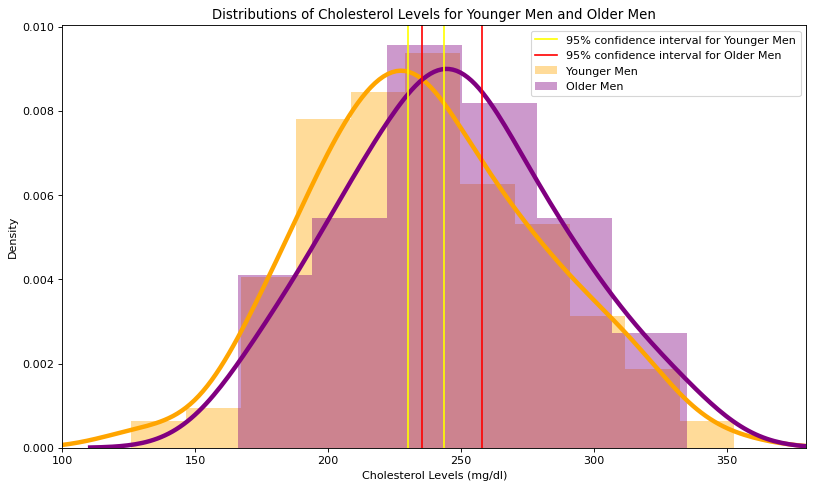

In [11]:
#plot the histogram and density curve on the same plot

#this sets the colour transparency and line thickness of the plots
kwargs = dict(hist_kws={'alpha':0.4}, kde_kws={'linewidth':4})

x1 = younger_men
x2 = older_men

plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(x1, color="orange", label="Younger Men", **kwargs)
sns.distplot(x2, color="purple", label="Older Men", **kwargs)

plt.xlabel('Cholesterol Levels (mg/dl)')
plt.xlim(100,380)

plt.title('Distributions of Cholesterol Levels for Younger Men and Older Men')
plt.axvline(x = 229.95, color = 'yellow', label = '95% confidence interval for Younger Men')
plt.axvline(x = 243.69, color = 'yellow')
plt.axvline(x = 235.3, color = 'red', label = '95% confidence interval for Older Men ')
plt.axvline(x = 258.0, color = 'red')
plt.legend();